# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The problem is to develop a ML model which will predict the salaries of new job postings. The model will learn from existing job postings data which has some features and the target variable which is the 'actual salary'. We also want to see which features has the highest impact on salary and which has the lowest impact.

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
#etc

#your info here
__author__ = "Nithin"
__email__ = "nithinr98@yahoo.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
salary_train=pd.read_csv('C:/Users/nnampoothiry/Desktop/Github/SalaryPrediction/salarypredictionportfolio/data/train_features.csv')
salary_test=pd.read_csv('C:/Users/nnampoothiry/Desktop/Github/SalaryPrediction/salarypredictionportfolio/data/test_features.csv')
salary_train_target=pd.read_csv('C:/Users/nnampoothiry/Desktop/Github/SalaryPrediction/salarypredictionportfolio/data/train_salaries.csv')

In [3]:
salary_train.shape

(1000000, 8)

In [4]:
salary_test.shape

(1000000, 8)

In [5]:
salary_train_target.shape

(1000000, 2)

In [6]:
salary_train.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [7]:
salary_test.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [8]:
salary_train_target.head(2)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101


### ---- 3 Clean the data ----

In [9]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [10]:
salary_train.jobId.duplicated().any()

False

In [11]:
salary_test.jobId.duplicated().any()

False

In [12]:
salary_train_target.jobId.duplicated().any()

False

In [13]:
salary_train.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [14]:
salary_test.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [15]:
salary_train_target.isnull().sum()

jobId     0
salary    0
dtype: int64

In [16]:
salary_train_target.salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

In [17]:
salary_zero=salary_train_target.loc[(salary_train_target.salary<1)]

In [18]:
salary_zero.shape

(5, 2)

In [19]:
salary_train_target.salary.mean()

116.061818

In [20]:
salary_train_target.loc[(salary_train_target.salary<1),'salary']=salary_train_target.salary.mean()

In [21]:
salary_train_target.salary.describe()

count    1000000.000000
mean         116.062398
std           38.717067
min           17.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

### ---- 4 Explore the data (EDA) ----

In [22]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [23]:
salary_train.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [24]:
salary_test.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [25]:
salary_train_target.describe()

,salary
count,1000000.000000
mean,116.062398
std,38.717067
min,17.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


In [26]:
salary_train.jobType.value_counts()#.plot(kind='bar')

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

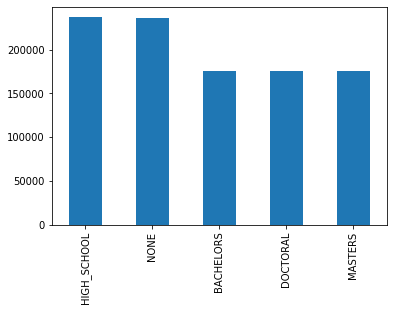

In [27]:
salary_train.degree.value_counts().plot(kind='bar')

In [28]:
salary_train.major.value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [29]:
salary_train.industry.value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [30]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
#Transformation Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [33]:
#numerical columns
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [34]:
salary_train_num=salary_train[['yearsExperience', 'milesFromMetropolis']]

In [35]:
#Categorical Columns
from sklearn.compose import ColumnTransformer

In [36]:
num_attribs=list(salary_train_num)
cat_attribs=list(salary_train[['jobType', 'degree', 'major', 'industry']])

In [37]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])

In [38]:
salary_train_prepared=full_pipeline.fit_transform(salary_train)

In [39]:
salary_train_prepared.dtype

dtype('float64')

In [40]:
salary_train_prepared # Now Go to the linear regression step to see this being used

<1000000x31 sparse matrix of type '<class 'numpy.float64'>'
	with 6000000 stored elements in Compressed Sparse Row format>

In [41]:
#%matplotlib inline
import matplotlib.pyplot as plt
#salary_train.hist(bins=100,figsize=(10,10))
#plt.show()

In [42]:
salary_train.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [43]:
#Correlation between features
from pandas.plotting import scatter_matrix

#attributes=['yearsExperience', 'milesFromMetropolis']

#scatter_matrix(salary_train[attributes],figsize=(12,8))

In [44]:
#correlation between features and target

### ---- 5 Establish a baseline ----

In [45]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [46]:
salary_column=salary_train_target[["salary"]]

In [47]:
from sklearn.dummy import DummyRegressor

In [48]:
dummy_regr=DummyRegressor(strategy='mean')

In [49]:
dummy_regr.fit(salary_train_prepared,salary_column)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
scores=cross_val_score(dummy_regr,salary_train_prepared,salary_column,scoring="neg_mean_squared_error",cv=5)

In [52]:
averageModel_rmse_scores=np.sqrt(-scores)

In [53]:
averageModel_rmse_scores

array([38.76486964, 38.75827579, 38.76632086, 38.65556362, 38.64043814])

In [54]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [55]:
display_scores(averageModel_rmse_scores)

Scores: [38.76486964 38.75827579 38.76632086 38.65556362 38.64043814]
Mean: 38.71709360999336
Standard Deviation: 0.056681292712518136


In [56]:
#MSE --to be used before rmse scores
from sklearn.metrics import mean_squared_error

In [57]:
salary_predictions=dummy_regr.predict(salary_train_prepared)

In [58]:
averageModel_mse=mean_squared_error(salary_column,salary_predictions)

In [59]:
averageModel_rmse=np.sqrt(averageModel_mse)

In [60]:
averageModel_rmse

38.71704723335872

### ---- 6 Hypothesize solution ----

In [61]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [62]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

In [63]:
salary_train.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [64]:
salary_train.major.value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [65]:
salary_train.loc[((salary_train.major=='CHEMISTRY')|(salary_train.major=='ENGINEERING') | (salary_train.major=='PHYSICS') |
                (salary_train.major=='COMPSCI') | (salary_train.major=='BIOLOGY')|(salary_train.major=='MATH')),
                "degree_type"]='STEM'

In [66]:
salary_train.loc[((salary_train.major=='LITERATURE')|(salary_train.major=='BUSINESS')),"degree_type"]='NON-STEM'

In [67]:
salary_train.loc[(salary_train.major=='NONE'),"degree_type"]='NO_DEGREE'

In [68]:
salary_train.degree_type.value_counts()

NO_DEGREE    532355
STEM         350443
NON-STEM     117202
Name: degree_type, dtype: int64

In [69]:
salary_train.jobType.value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [70]:
salary_train.loc[((salary_train.jobType=='SENIOR')|(salary_train.jobType=='VICE_PRESIDENT')| (salary_train.jobType=='CTO') |
                (salary_train.jobType=='CEO') | (salary_train.jobType=='CFO')),
                "management_level"]='SENIOR'

In [71]:
salary_train.loc[(salary_train.jobType=='MANAGER'),"management_level"]='MID-LEVEL'

In [72]:
salary_train.loc[(salary_train.jobType=='JUNIOR'),"management_level"]='ENTRY-LEVEL'

In [73]:
salary_train.loc[(salary_train.jobType=='JANITOR'),"management_level"]='UNSKILLED'

In [74]:
salary_train.management_level.value_counts()

SENIOR         625314
MID-LEVEL      125121
UNSKILLED      124971
ENTRY-LEVEL    124594
Name: management_level, dtype: int64

In [75]:
salary_train.industry.value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [76]:
salary_train.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,degree_type,management_level
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,STEM,SENIOR
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,NO_DEGREE,SENIOR
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,STEM,SENIOR
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,STEM,MID-LEVEL
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,STEM,SENIOR


In [77]:
salary_train.jobId.duplicated().any()

False

In [78]:
salary_train.companyId.duplicated().any()

True

In [79]:
salary_train_new=salary_train.drop(['companyId'],axis=1)

In [80]:
salary_train_new.head(5)

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,degree_type,management_level
0,JOB1362684407687,CFO,MASTERS,MATH,HEALTH,10,83,STEM,SENIOR
1,JOB1362684407688,CEO,HIGH_SCHOOL,NONE,WEB,3,73,NO_DEGREE,SENIOR
2,JOB1362684407689,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,STEM,SENIOR
3,JOB1362684407690,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,STEM,MID-LEVEL
4,JOB1362684407691,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,STEM,SENIOR


In [81]:
#salary_train_new_num=salary_train_new[['yearsExperience', 'milesFromMetropolis']]

In [82]:
salary_new_num_attribs=list(salary_train_new[['yearsExperience', 'milesFromMetropolis']])
salary_new_cat_attribs=list(salary_train_new[['jobType', 'degree', 'major', 'industry','degree_type','management_level']])

In [83]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,salary_new_num_attribs),
    ("cat",OneHotEncoder(),salary_new_cat_attribs),
])

In [84]:
salary_train_new_prepared=full_pipeline.fit_transform(salary_train_new)

In [85]:
salary_train_new_prepared

<1000000x38 sparse matrix of type '<class 'numpy.float64'>'
	with 8000000 stored elements in Compressed Sparse Row format>

### ---- 8 Create models ----

In [86]:
#create and tune the models that you brainstormed during part 2

##### Linear regression model

In [161]:

from sklearn.linear_model import LinearRegression

In [162]:
lin_reg=LinearRegression()

In [163]:
salary_train_target.columns

Index(['jobId', 'salary'], dtype='object')

In [164]:
salary_labels=salary_train_target[['salary']]

In [165]:
#Fit the model
lin_reg.fit(salary_train_new_prepared,salary_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
#Doing Predictions
some_data=salary_train_new.iloc[:5]

In [167]:
some_labels=salary_labels.iloc[:5]

In [168]:
some_data_new_prepared=full_pipeline.transform(some_data)

In [169]:
print("Predictions:", lin_reg.predict(some_data_new_prepared))

Predictions: [[128.39457006]
 [113.17107655]
 [138.44679916]
 [125.4038118 ]
 [148.08104458]]


In [170]:
print("Labels:",(some_labels))

Labels:    salary
0   130.0
1   101.0
2   137.0
3   142.0
4   163.0


In [171]:
salary_predictions=lin_reg.predict(salary_train_new_prepared)

In [172]:
lin_mse=mean_squared_error(salary_labels,salary_predictions)

In [173]:
lin_rmse=np.sqrt(lin_mse)

In [174]:
lin_rmse

19.605717709335597

##### Decision tree regressor model

In [175]:
from sklearn.tree import DecisionTreeRegressor

In [176]:
tree_reg=DecisionTreeRegressor()

In [177]:
tree_reg.fit(salary_train_new_prepared,salary_labels) # 10mins

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [178]:
print("Predictions:", tree_reg.predict(some_data_new_prepared))

Predictions: [120. 125. 156. 142. 146.]


In [179]:
print("Labels:",(some_labels))

Labels:    salary
0   130.0
1   101.0
2   137.0
3   142.0
4   163.0


In [180]:
salary_predictions=tree_reg.predict(salary_train_new_prepared)

In [181]:
tree_mse=mean_squared_error(salary_labels,salary_predictions)

In [182]:
tree_rmse=np.sqrt(tree_mse)

In [183]:
tree_rmse

9.007685682302638

##### Random forest regressor model

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
forest_reg=RandomForestRegressor(n_jobs=-1)

In [148]:
forest_reg.fit(salary_train_new_prepared,salary_labels.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [152]:
print("Predictions:", forest_reg.predict(some_data_new_prepared))

Predictions: [120.10666667 124.259      154.54833333 131.88       147.33495238]


In [153]:
print("Labels:",(some_labels))

Labels:    salary
0   130.0
1   101.0
2   137.0
3   142.0
4   163.0


In [156]:
salary_predictions=forest_reg.predict(salary_train_new_prepared)

In [157]:
forest_mse=mean_squared_error(salary_labels,salary_predictions)

In [158]:
#forest_mse

In [159]:
forest_rmse=np.sqrt(forest_mse)

In [160]:
forest_rmse

10.89361524222142

##### Test H2O

In [87]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [117]:
#Connect to H20
#h2o.init(ip='localhost', nthreads=-1,
        # min_mem_size='8G', max_mem_size='200G')

In [118]:
#h2o.init()

In [90]:
#drf=H2ORandomForestEstimator()

In [119]:
#hf_train=h2o.H2OFrame(salary_train_new)

In [120]:
#hf_target=h2o.H2OFrame(salary_labels)

In [102]:
#train, valid = hf_train.split_frame(ratios=[.8], seed=1234)

In [121]:
#drf.train(x=hf_train,y=salary_labels,
          #training_frame=train,
          #validation_frame=valid)

##### SVM

In [154]:
from sklearn.svm import SVR

In [155]:
svm_reg=SVR()

In [ ]:
svm_reg.fit(salary_train_new_prepared,salary_labels.values.ravel())

C:\Users\nnampoothiry\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

##### Linear regression

In [184]:
lin_scores=cross_val_score(lin_reg,salary_train_new_prepared,salary_labels,
                          scoring="neg_mean_squared_error",cv=10)

In [185]:
lin_rmse_scores=np.sqrt(-lin_scores)

In [186]:
display_scores(lin_rmse_scores)

Scores: [19.6381003  19.67102333 19.58431551 19.66782294 19.64909806 19.64456265
 19.51815307 19.60097588 19.52304567 19.5668322 ]
Mean: 19.60639296008991
Standard Deviation: 0.05389953150004629


##### Decision tree regressor

In [140]:
tree_scores=cross_val_score(tree_reg,salary_train_new_prepared,salary_labels,
                          scoring="neg_mean_squared_error",cv=10)

In [141]:
tree_rmse_scores=np.sqrt(-tree_scores)

In [142]:
display_scores(tree_rmse_scores)

Scores: [26.1826159  26.23124848 26.01048142 26.14379953 26.15718934 26.20935763
 26.10826791 26.15539208 26.21892353 26.0669497 ]
Mean: 26.1484225523938
Standard Deviation: 0.06643611320298912


##### Random Forest Regressor

In [149]:
forest_scores=cross_val_score(forest_reg,salary_train_new_prepared,salary_labels.values.ravel(),
                          scoring="neg_mean_squared_error",cv=5) #12mins to execute

In [150]:
forest_rmse_scores=np.sqrt(-forest_scores)

In [151]:
display_scores(forest_rmse_scores)

Scores: [21.04800603 21.038697   21.08006959 20.99787224 20.99560905]
Mean: 21.032050782221653
Standard Deviation: 0.031939697796734


### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data